In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Unique sample selection probabilities

In [4]:
res <- lapply(c("RANDU", "MT", "SD", "SHA256"), function(prngname){
    read.csv(paste0("../rawdata/US_", prngname,"_PIKK.csv"), header = FALSE)
})
res <- do.call(rbind, res)
colnames(res) <- c("Pop.size", "Sample.size", "seed", "reps", "Algorithm", "PRNG",
                  "Chisq.Stat", "Chisq.DF", "Chisq.P.value",
                  "Range.Stat", "Range.P.value",
                  "Max.Selection.Prob.Ratio")
head(res)
dim(res)
str(res)

Pop.size,Sample.size,seed,reps,Algorithm,PRNG,Chisq.Stat,Chisq.DF,Chisq.P.value,Range.Stat,Range.P.value,Max.Selection.Prob.Ratio
13,4,100,100000,PIKK,RANDU,702.8022,714,0.6103466,86,0.03939043,1
13,4,100,200000,PIKK,RANDU,678.9356,714,0.8227319,100,0.71152158,1
13,4,100,300000,PIKK,RANDU,686.9485,714,0.7603429,109,0.98773075,1
13,4,100,400000,PIKK,RANDU,753.8964,714,0.1458761,144,0.62533743,1
13,4,100,500000,PIKK,RANDU,741.4526,714,0.2311838,151,0.88355571,1
13,4,100,600000,PIKK,RANDU,757.9888,714,0.1233220,181,0.49499822,1


[1] 4000   12

'data.frame':	4000 obs. of  12 variables:
 $ Pop.size                : int  13 13 13 13 13 13 13 13 13 13 ...
 $ Sample.size             : int  4 4 4 4 4 4 4 4 4 4 ...
 $ seed                    : int  100 100 100 100 100 100 100 100 100 100 ...
 $ reps                    : int  100000 200000 300000 400000 500000 600000 700000 800000 900000 1000000 ...
 $ Algorithm               : Factor w/ 1 level "PIKK": 1 1 1 1 1 1 1 1 1 1 ...
 $ PRNG                    : Factor w/ 4 levels "RANDU","MT","SD",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Chisq.Stat              : num  703 679 687 754 741 ...
 $ Chisq.DF                : int  714 714 714 714 714 714 714 714 714 714 ...
 $ Chisq.P.value           : num  0.61 0.823 0.76 0.146 0.231 ...
 $ Range.Stat              : int  86 100 109 144 151 181 201 209 231 235 ...
 $ Range.P.value           : num  0.0394 0.7115 0.9877 0.6253 0.8836 ...
 $ Max.Selection.Prob.Ratio: num  1 1 1 1 1 1 1 1 1 1 ...


# n = 13 results

Warning message:
“Removed 17 rows containing missing values (geom_smooth).”

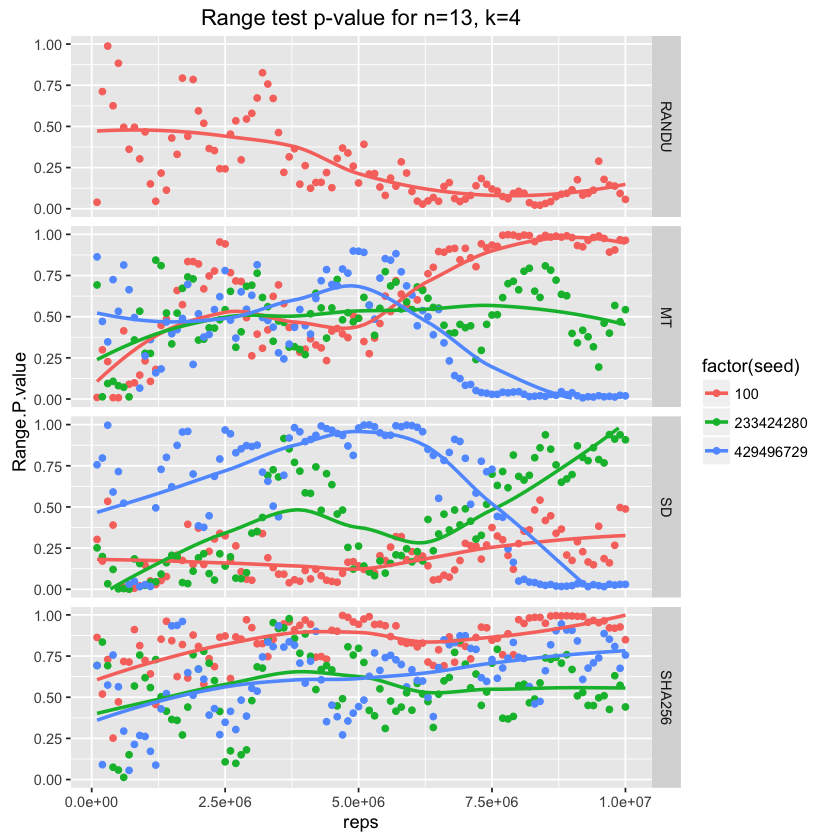

In [10]:
res %>% 
    filter(Pop.size == 13, Sample.size == 4) %>%
    ggplot(aes(x = reps, y = Range.P.value, color = factor(seed))) + 
    geom_point() + geom_smooth(se = FALSE) +
    facet_grid(PRNG~.) +
    ylim(0, 1) + 
    ggtitle("Range test p-value for n=13, k=4")

## Another view of the same data...

Warning message:
“Removed 33 rows containing missing values (geom_smooth).”

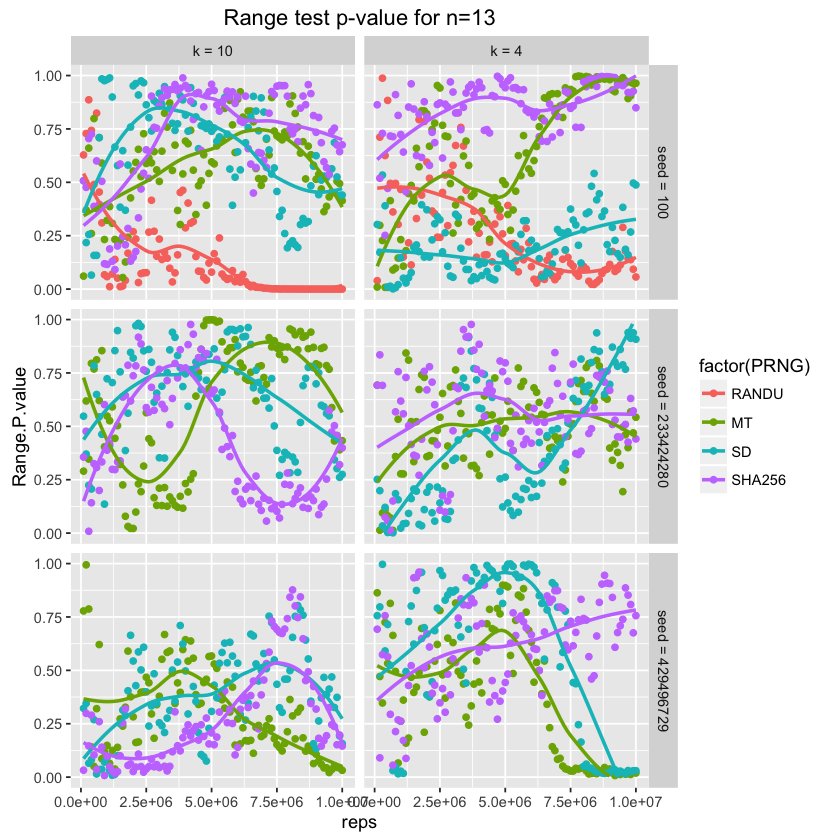

In [19]:
res %>% 
    filter(Pop.size == 13) %>%
    mutate(seed = paste0("seed = ", seed)) %>%
    mutate(Sample.size = paste0("k = ", Sample.size)) %>%
    ggplot(aes(x = reps, y = Range.P.value, color = factor(PRNG))) + 
    geom_point() + geom_smooth(se = FALSE) +
    facet_grid(seed~Sample.size) +
    ylim(0, 1) + 
    ggtitle("Range test p-value for n=13")

Warning message:
“Removed 16 rows containing missing values (geom_smooth).”

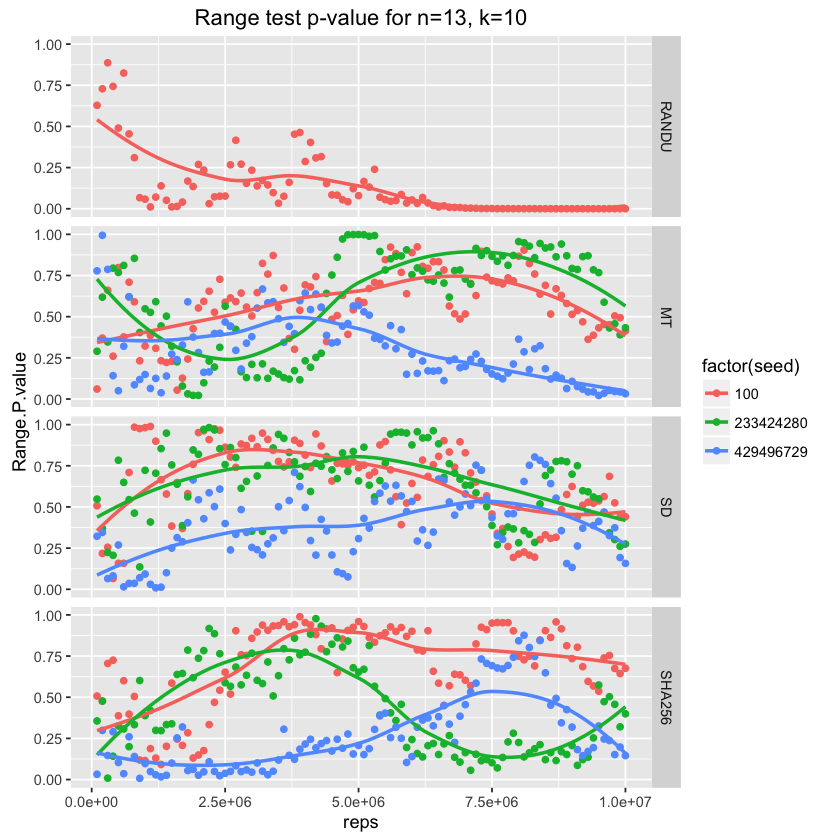

In [12]:
res %>% 
    filter(Pop.size == 13, Sample.size == 10) %>%
    ggplot(aes(x = reps, y = Range.P.value, color = factor(seed))) + 
    geom_point() + geom_smooth(se = FALSE) +
    facet_grid(PRNG~.) +
    ylim(0, 1) + 
    ggtitle("Range test p-value for n=13, k=10")

Warning message:
“Removed 85 rows containing missing values (geom_smooth).”

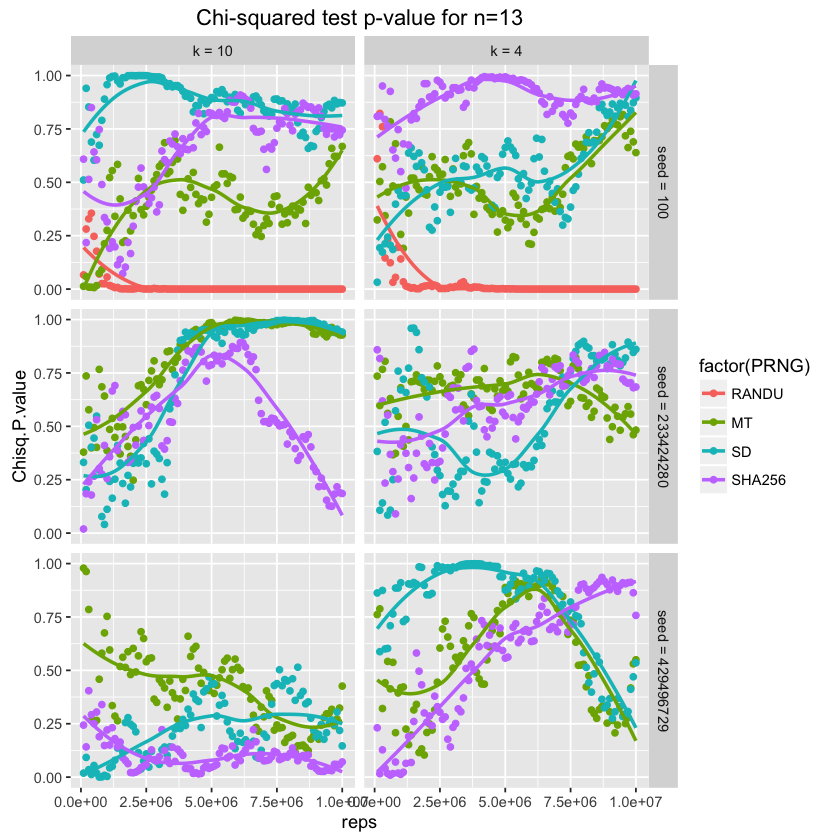

In [21]:
res %>% 
    filter(Pop.size == 13) %>%
    mutate(seed = paste0("seed = ", seed)) %>%
    mutate(Sample.size = paste0("k = ", Sample.size)) %>%
    ggplot(aes(x = reps, y = Chisq.P.value, color = factor(PRNG))) + 
    geom_point() + geom_smooth(se = FALSE) +
    facet_grid(seed~Sample.size) +
    ylim(0, 1) + 
    ggtitle("Chi-squared test p-value for n=13")

# n = 30, k = 4

Warning message:
“Removed 29 rows containing missing values (geom_smooth).”

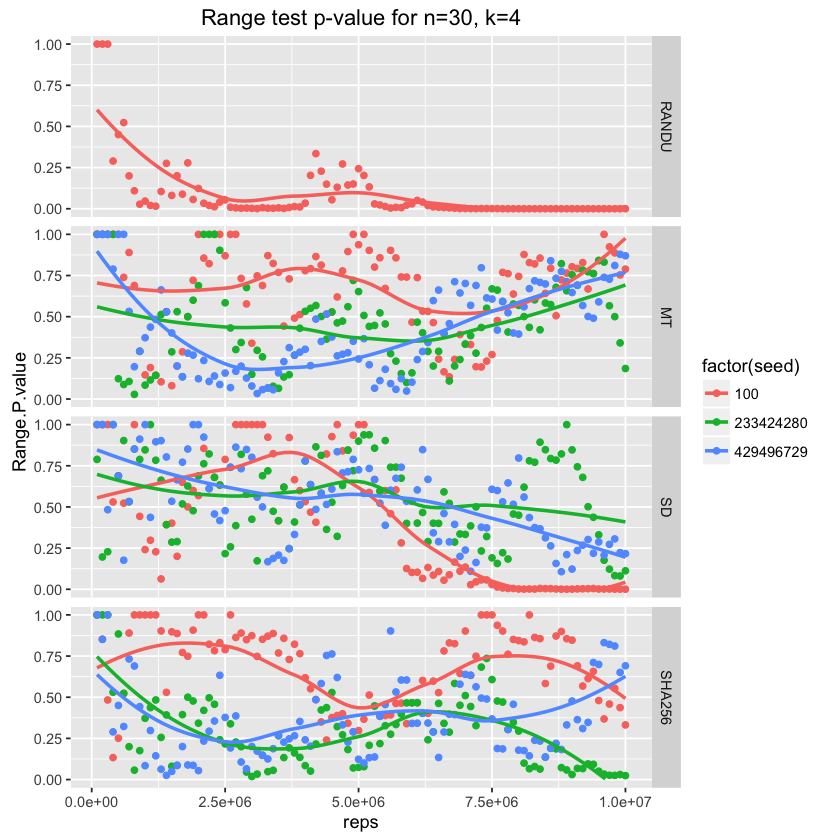

In [11]:
res %>% 
    filter(Pop.size == 30, Sample.size == 4) %>%
    ggplot(aes(x = reps, y = Range.P.value, color = factor(seed))) + 
    geom_point() + geom_smooth(se = FALSE) +
    facet_grid(PRNG~.) +
    ylim(0, 1) + 
    ggtitle("Range test p-value for n=30, k=4")

Warning message:
“Removed 29 rows containing missing values (geom_smooth).”

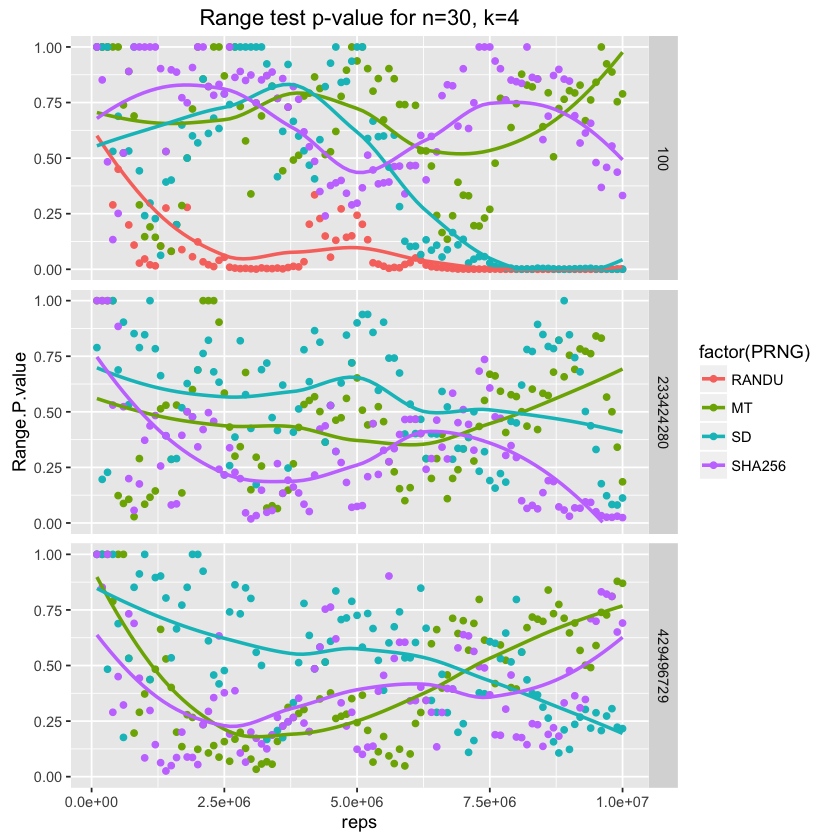

In [22]:
res %>% 
    filter(Pop.size == 30, Sample.size == 4) %>%
    ggplot(aes(x = reps, y = Range.P.value, color = factor(PRNG))) + 
    geom_point() + geom_smooth(se = FALSE) +
    facet_grid(seed~.) +
    ylim(0, 1) + 
    ggtitle("Range test p-value for n=30, k=4")

Warning message:
“Removed 44 rows containing missing values (geom_smooth).”

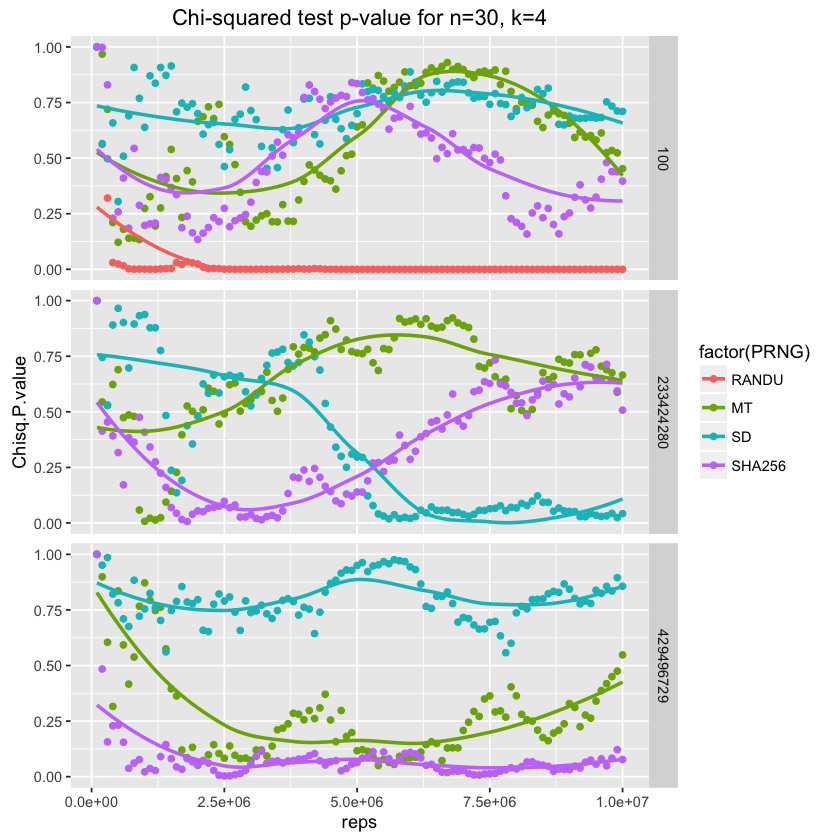

In [26]:
res %>% 
    filter(Pop.size == 30, Sample.size == 4) %>%
    ggplot(aes(x = reps, y = Chisq.P.value, color = factor(PRNG))) + 
    geom_point() + geom_smooth(se = FALSE) +
    facet_grid(seed~.) +
    ylim(0, 1) + 
    ggtitle("Chi-squared test p-value for n=30, k=4")